In [5]:
from trafficintelligence import cvutils
from trafficintelligence import storage

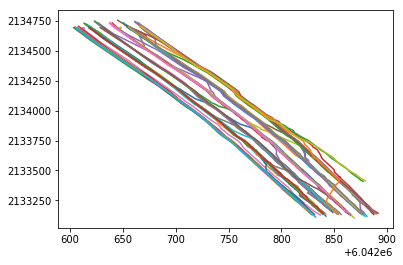

In [6]:
objects = storage.loadTrajectoriesFromNgsimFile('./trajectories-0400-0415.txt',100)
for o in objects: o.plot()

# Loading Trajectory Data Extracted from Video using Python Libraries 
https://bitbucket.org/Nicolas/trafficintelligence/wiki/Loading%20Trajectory%20Data%20Extracted%20from%20Video%20using%20Python%20Libraries

If you succeeded to run the feature-based tracking software, you now have a SQLite database as result (you can download the same laurier.sqlite in the Downloads section or in the samples directory of the repository). The interpretation modules are writting in Python (see the Home wiki page to get the provided Python code to work). The functions to load trajectories are in the storage module. Loading moving object trajectories is simple:

In [7]:
objects = storage.loadTrajectoriesFromSqlite('laurier.sqlite', 'object')

This will load all moving object trajectories from the database in a list of instances of moving.MovingObject, which have the fields positions and velocities which are instances of moving.Trajectory, trajectories which are series of (x,y) coordinates, a first and a last instant (measures in frames). The velocity is also 2-dimensional since it is a vector (the speed vector). The speed is its norm, here is how to compute the speed at instant 10 for object 0 (in unit of distance per frame):

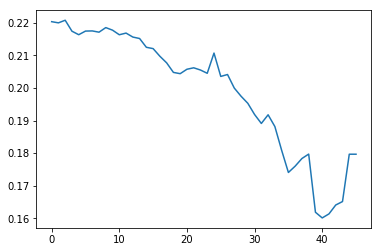

In [9]:
speed = objects[0].getVelocityAtInstant(10).norm2()
timeInterval = objects[0].getTimeInterval()
speeds = [objects[0].getVelocityAtInstant(t).norm2() for t in range(timeInterval.first, timeInterval.last)]
speeds = [v.norm2() for v in objects[0].getVelocities()]
from matplotlib.pyplot import plot, close, axis
plot(range(timeInterval.first, timeInterval.last+1), speeds)

The second and third lines compute all the speeds of the object (note that the velocity trajectory is one element shorter than the positions since only n-1 displacement can be computed based on n positions, and are associated with the first instant to the frame before the last instant). Note also that the moving.Trajectory objects are iterable (as well as moving.TimeInterval). The last line plots the speed as a function of time. 
Finally, plotting the trajectories is as simple as (after either clearing the figure (clf()), closing it (close() or close('all')) or creating a new one (figure()))

(152.58195530303036, 160.38693863636362, 40.74686495867769, 47.48843586776862)

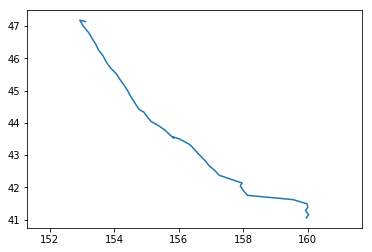

In [10]:
close('all')
objects[0].plot()
axis('equal')

The last line makes the x and y scales equal (from matplotlib). 

Features, ie the trajectories of the points tracked on each moving object, grouped by object, can be loaded. The advantage is the quality of the trajectories which are much smoother (the object trajectory is simply the average position of the feature positions at each instant; the same is done, but intrinsically better, for velocities). 


In [11]:
features = storage.loadTrajectoriesFromSqlite('laurier.sqlite', 'feature')
objects[0].setFeatures(features)

The same function storage.loadTrajectoriesFromSqlite is used, returning the same data types, a list of instances of moving.MovingObject. The feature instances can be linked to the objects using the list of features ids that constitute an object in the featureNumbers field of a MovingObject. That is what the second line does: the setFeatures method of moving.MovingObject stores references to the feature instances in its features field. Finally, there is a last optional parameter in storage.loadTrajectoriesFromSqlite to control the number of objects to load (default is -1 which will load all objects, moving objects or features, from the database). Features of an object can be plotted in the following way (on an empty figure):


(148.2133, 161.1867, 40.364845, 50.281455)

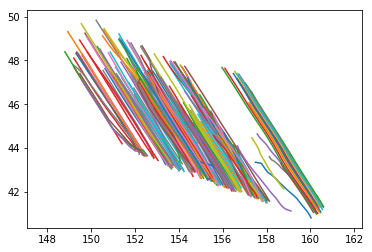

In [12]:
for f in objects[0].features: f.plot()
axis('equal')

The plot method can take a simple string argument like the matplotlib plot function, eg 'bx' for blue crosses.